In [5]:
from kaggle_environments import make, evaluate

opponents = ["random", "greedy"]

env = make("hungry_geese", debug=False)
env.reset()
env.run(["greedy", "main.py", "better_random.py", "better_random.py"])
env.render(mode="ipython", width=1000, height=700)

#evaluate("hungry_geese", ["greedy", "random", "greedy", "greedy"], {}, [], 100)


In [2]:
import main

main.agent

import better_random
better_random.agent(None, None)

<function better_random.agent(obs_dict, config_dict)>

In [3]:
from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Action
import numpy as np

env = make("hungry_geese", debug=False)

trainer = env.train([None, "greedy", "greedy", "greedy"])
possible_moves = [Action.NORTH.name, Action.EAST.name, Action.SOUTH.name, Action.WEST.name]

obs = []
observation = trainer.reset()
obs.append(observation)

done = False
while not done:
    action = np.random.choice(possible_moves)
    
    observation, reward, done, info = trainer.step(action)
    obs.append(observation)


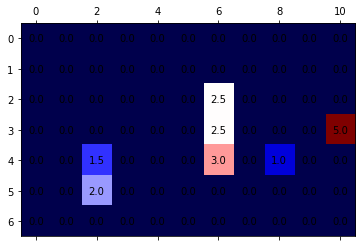

Head 43 (3, 5)
translated 52 (4, 3)
translated 57 (5, 8)
translated 57 (4, 8)
translated 50 (4, 1)
translated 50 (3, 1)
translated 50 (2, 1)


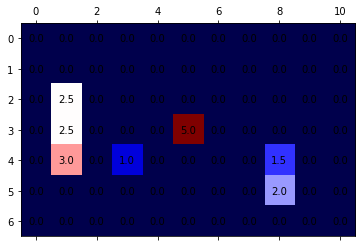

{'remainingOverageTime': 60, 'step': 6, 'geese': [[43], [52], [57, 46], [50, 39, 28]], 'food': [69, 68], 'index': 0}


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from DQN.model import Model
from shared.memory_manager import MemoryManager
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration
from kaggle_environments.envs.hungry_geese.hungry_geese import row_col

from shared.map import Map


memory_manager = MemoryManager(-1, 0.99)
memory_manager.add_memory([obs[-3], 1, 1, 3, 0, obs[-2]], 1)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

trans_obs = memory_manager.last_episode[0][0]
map = Map(trans_obs, 11)
data = map.build_opponent_map(1).reshape(7,11)
data = map.build_opponent_map(0).reshape(7,11)

original = np.zeros(77)
original[map.player_head] = 5
for i in range(4):
    if i != trans_obs["index"]:
        if len(trans_obs["geese"][i]) != 0:
            original[trans_obs["geese"][i][0]] = i
            
            for j in range(1, len(map.geese[i])):
                original[trans_obs["geese"][i][j]] = i - 0.5



data = original.reshape(7,11)

fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

transformed = np.zeros(77)
transformed[map.geese[map.player_index][0]] = 5
for i in range(4):
    if i != trans_obs["index"]:
        if len(map.geese[i]) != 0:
            transformed[map.geese[i][0]] = i
        
            for j in range(1, len(map.geese[i])):
                transformed[map.geese[i][j]] = i - 0.5


transformed = np.zeros(77)
data = transformed.reshape(7,11)

data[map.translate(map.player_head)] = 5
print("Head", map.player_head, map.translate(map.player_head))
for i in range(4):
    if i != trans_obs["index"]:
        if len(trans_obs["geese"][i]) != 0:
            data[map.translate(trans_obs["geese"][i][0])] = i
            print("translated", trans_obs["geese"][i][0], map.translate(trans_obs["geese"][i][0]))
            
            for j in range(1, len(map.geese[i])):
                data[map.translate(trans_obs["geese"][i][j])] = i - 0.5
                print("translated", trans_obs["geese"][i][0], map.translate(trans_obs["geese"][i][j]))



fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()


print(trans_obs)
